In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
a = pd.read_csv("./data_tr_4dist.csv")

FileNotFoundError: ignored

In [ ]:
data = pd.read_csv("./data_tr_4dist.csv")

In [ ]:
a.iat[0, 0].split("-")[2][3:5]

'01'

In [ ]:
a["year"] = a.iloc[:, 0].apply(lambda x : int(x.split("-")[0]))
a["month"] = a.iloc[:, 0].apply(lambda x : int(x.split("-")[1]))
a["day"] = a.iloc[:, 0].apply(lambda x : int(x.split("-")[2][0:2]))
a["time"] = a.iloc[:, 0].apply(lambda x : int(x.split("-")[2][3:5]))

In [ ]:
a

,datetime,4단지배수지 공업 유출유량 적산차,year,month,day,time
0,2017-01-01 01:00:00,525.0,2017,1,1,1
1,2017-01-01 02:00:00,542.0,2017,1,1,2
2,2017-01-01 03:00:00,392.0,2017,1,1,3
3,2017-01-01 04:00:00,379.0,2017,1,1,4
4,2017-01-01 05:00:00,353.0,2017,1,1,5
...,...,...,...,...,...,...
35058,2020-12-31 19:00:00,626.0,2020,12,31,19
35059,2020-12-31 20:00:00,294.0,2020,12,31,20
35060,2020-12-31 21:00:00,234.0,2020,12,31,21
35061,2020-12-31 22:00:00,704.0,2020,12,31,22


In [ ]:
a["4단지배수지 공업 유출유량 적산차"]

0        525.0
1        542.0
2        392.0
3        379.0
4        353.0
         ...  
35058    626.0
35059    294.0
35060    234.0
35061    704.0
35062    330.0
Name: 4단지배수지 공업 유출유량 적산차, Length: 35063, dtype: float64

In [ ]:
a = a.rename(columns={'4단지배수지 공업 유출유량 적산차' : 'integration'})
a

,datetime,integration,year,month,day,time
0,2017-01-01 01:00:00,525.0,2017,1,1,1
1,2017-01-01 02:00:00,542.0,2017,1,1,2
2,2017-01-01 03:00:00,392.0,2017,1,1,3
3,2017-01-01 04:00:00,379.0,2017,1,1,4
4,2017-01-01 05:00:00,353.0,2017,1,1,5
...,...,...,...,...,...,...
35058,2020-12-31 19:00:00,626.0,2020,12,31,19
35059,2020-12-31 20:00:00,294.0,2020,12,31,20
35060,2020-12-31 21:00:00,234.0,2020,12,31,21
35061,2020-12-31 22:00:00,704.0,2020,12,31,22


In [ ]:
a["datetime"] = pd.to_datetime(a["datetime"],format= '%Y-%m-%d %H:%M:%S' ,errors="raise" )

In [ ]:
for i in a[a["integration"].isnull()].index:
    a.drop(index=[i], inplace = True)
a

,datetime,integration,year,month,day,time
0,2017-01-01 01:00:00,525.0,2017,1,1,1
1,2017-01-01 02:00:00,542.0,2017,1,1,2
2,2017-01-01 03:00:00,392.0,2017,1,1,3
3,2017-01-01 04:00:00,379.0,2017,1,1,4
4,2017-01-01 05:00:00,353.0,2017,1,1,5
...,...,...,...,...,...,...
35058,2020-12-31 19:00:00,626.0,2020,12,31,19
35059,2020-12-31 20:00:00,294.0,2020,12,31,20
35060,2020-12-31 21:00:00,234.0,2020,12,31,21
35061,2020-12-31 22:00:00,704.0,2020,12,31,22


In [ ]:
q1 = a[["integration"]].quantile(q=0.25)
q3 = a[["integration"]].quantile(q=0.75)
iqr = q3 - q1

iqr_df2 = a[(a["integration"] <= q3["integration"]+5*iqr["integration"]) & (a["integration"] >= q3["integration"]-5*iqr["integration"])]
iqr_df2

,datetime,integration,year,month,day,time
0,2017-01-01 01:00:00,525.0,2017,1,1,1
1,2017-01-01 02:00:00,542.0,2017,1,1,2
2,2017-01-01 03:00:00,392.0,2017,1,1,3
3,2017-01-01 04:00:00,379.0,2017,1,1,4
4,2017-01-01 05:00:00,353.0,2017,1,1,5
...,...,...,...,...,...,...
35058,2020-12-31 19:00:00,626.0,2020,12,31,19
35059,2020-12-31 20:00:00,294.0,2020,12,31,20
35060,2020-12-31 21:00:00,234.0,2020,12,31,21
35061,2020-12-31 22:00:00,704.0,2020,12,31,22


In [ ]:
iqr_df2.to_csv("./test_preprocessing.csv")

<AxesSubplot:xlabel='datetime'>

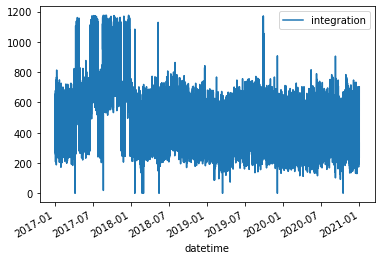

In [ ]:
iqr_df.plot(x='datetime', y='integration')

<AxesSubplot:xlabel='datetime'>

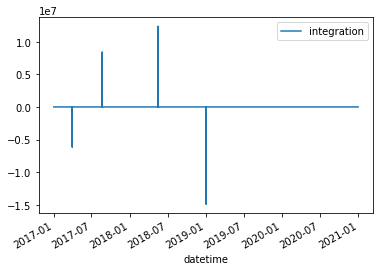

In [ ]:
a.plot(x='datetime', y='integration')

In [ ]:
a["integration"].min()

-14937079.0

In [ ]:
for i in iqr_df.index:
    iqr_df.at[i, "3ma"] = 

In [ ]:
17년도 : 102.3  103.7
18년도 : 99.6   100.3
19년도 : 97.4   98.4
20년도 : 92     97.8

In [ ]:
print("17년도 평균", iqr_df[iqr_df["year"]==2017]["integration"].mean())
print("18년도 평균", iqr_df[iqr_df["year"]==2018]["integration"].mean())
print("19년도 평균", iqr_df[iqr_df["year"]==2019]["integration"].mean())
print("20년도 평균", iqr_df[iqr_df["year"]==2020]["integration"].mean())

17년도 평균 653.7250470322804
18년도 평균 445.42499169237806
19년도 평균 442.24642560237527
20년도 평균 409.1824761758342


In [ ]:
print("1월 평균 ", iqr_df[iqr_df["month"]==1]["integration"].mean())
print("2월 평균 ", iqr_df[iqr_df["month"]==2]["integration"].mean())
print("3월 평균 ", iqr_df[iqr_df["month"]==3]["integration"].mean())
print("4월 평균 ", iqr_df[iqr_df["month"]==4]["integration"].mean())
print("5월 평균 ", iqr_df[iqr_df["month"]==5]["integration"].mean())
print("6월 평균 ", iqr_df[iqr_df["month"]==6]["integration"].mean())
print("7월 평균 ", iqr_df[iqr_df["month"]==7]["integration"].mean())
print("8월 평균 ", iqr_df[iqr_df["month"]==8]["integration"].mean())
print("9월 평균 ", iqr_df[iqr_df["month"]==9]["integration"].mean())
print("10월 평균 ", iqr_df[iqr_df["month"]==10]["integration"].mean())
print("11월 평균 ", iqr_df[iqr_df["month"]==11]["integration"].mean())
print("12월 평균 ", iqr_df[iqr_df["month"]==12]["integration"].mean())

1월 평균  434.2286246805649
2월 평균  403.3077627675276
3월 평균  405.0026075319435
4월 평균  479.1742608695652
5월 평균  449.60141271442984
6월 평균  496.0641785838856
7월 평균  561.5714314606741
8월 평균  524.307879041512
9월 평균  567.6664145416228
10월 평균  537.9731182795699
11월 평균  483.9650796657382
12월 평균  498.8315464237517


In [ ]:
print("17년도 1월 평균 ", iqr_df[(iqr_df["month"]==1 )&(iqr_df["year"]==2017)]["integration"].mean())
print("17년도 2월 평균 ", iqr_df[(iqr_df["month"]==2 )&(iqr_df["year"]==2017)]["integration"].mean())
print("17년도 3월 평균 ", iqr_df[(iqr_df["month"]==3 )&(iqr_df["year"]==2017)]["integration"].mean())
print("17년도 4월 평균 ", iqr_df[(iqr_df["month"]==4 )&(iqr_df["year"]==2017)]["integration"].mean())
print("17년도 5월 평균 ", iqr_df[(iqr_df["month"]==5 )&(iqr_df["year"]==2017)]["integration"].mean())
print("17년도 6월 평균 ", iqr_df[(iqr_df["month"]==6 )&(iqr_df["year"]==2017)]["integration"].mean())
print("17년도 7월 평균 ", iqr_df[(iqr_df["month"]==7 )&(iqr_df["year"]==2017)]["integration"].mean())
print("17년도 8월 평균 ", iqr_df[(iqr_df["month"]==8 )&(iqr_df["year"]==2017)]["integration"].mean())
print("17년도 9월 평균 ", iqr_df[(iqr_df["month"]==9 )&(iqr_df["year"]==2017)]["integration"].mean())
print("17년도 10월 평균 ", iqr_df[(iqr_df["month"]==10 )&(iqr_df["year"]==2017)]["integration"].mean())
print("17년도 11월 평균 ", iqr_df[(iqr_df["month"]==11 )&(iqr_df["year"]==2017)]["integration"].mean())
print("17년도 12월 평균 ", iqr_df[(iqr_df["month"]==12 )&(iqr_df["year"]==2017)]["integration"].mean())
print("18년도 1월 평균 ", iqr_df[(iqr_df["month"]==1 )&(iqr_df["year"]==2018)]["integration"].mean())
print("18년도 2월 평균 ", iqr_df[(iqr_df["month"]==2 )&(iqr_df["year"]==2018)]["integration"].mean())
print("18년도 3월 평균 ", iqr_df[(iqr_df["month"]==3 )&(iqr_df["year"]==2018)]["integration"].mean())
print("18년도 4월 평균 ", iqr_df[(iqr_df["month"]==4 )&(iqr_df["year"]==2018)]["integration"].mean())
print("18년도 5월 평균 ", iqr_df[(iqr_df["month"]==5 )&(iqr_df["year"]==2018)]["integration"].mean())
print("18년도 6월 평균 ", iqr_df[(iqr_df["month"]==6 )&(iqr_df["year"]==2018)]["integration"].mean())
print("18년도 7월 평균 ", iqr_df[(iqr_df["month"]==7 )&(iqr_df["year"]==2018)]["integration"].mean())
print("18년도 8월 평균 ", iqr_df[(iqr_df["month"]==8 )&(iqr_df["year"]==2018)]["integration"].mean())
print("18년도 9월 평균 ", iqr_df[(iqr_df["month"]==9 )&(iqr_df["year"]==2018)]["integration"].mean())
print("18년도 10월 평균 ", iqr_df[(iqr_df["month"]==10 )&(iqr_df["year"]==2018)]["integration"].mean())
print("18년도 11월 평균 ", iqr_df[(iqr_df["month"]==11 )&(iqr_df["year"]==2018)]["integration"].mean())
print("18년도 12월 평균 ", iqr_df[(iqr_df["month"]==12 )&(iqr_df["year"]==2018)]["integration"].mean())
print("19년도 1월 평균 ", iqr_df[(iqr_df["month"]==1 )&(iqr_df["year"]==2019)]["integration"].mean())
print("19년도 2월 평균 ", iqr_df[(iqr_df["month"]==2 )&(iqr_df["year"]==2019)]["integration"].mean())
print("19년도 3월 평균 ", iqr_df[(iqr_df["month"]==3 )&(iqr_df["year"]==2019)]["integration"].mean())
print("19년도 4월 평균 ", iqr_df[(iqr_df["month"]==4 )&(iqr_df["year"]==2019)]["integration"].mean())
print("19년도 5월 평균 ", iqr_df[(iqr_df["month"]==5 )&(iqr_df["year"]==2019)]["integration"].mean())
print("19년도 6월 평균 ", iqr_df[(iqr_df["month"]==6 )&(iqr_df["year"]==2019)]["integration"].mean())
print("19년도 7월 평균 ", iqr_df[(iqr_df["month"]==7 )&(iqr_df["year"]==2019)]["integration"].mean())
print("19년도 8월 평균 ", iqr_df[(iqr_df["month"]==8 )&(iqr_df["year"]==2019)]["integration"].mean())
print("19년도 9월 평균 ", iqr_df[(iqr_df["month"]==9 )&(iqr_df["year"]==2019)]["integration"].mean())
print("19년도 10월 평균 ", iqr_df[(iqr_df["month"]==10 )&(iqr_df["year"]==2019)]["integration"].mean())
print("19년도 11월 평균 ", iqr_df[(iqr_df["month"]==11 )&(iqr_df["year"]==2019)]["integration"].mean())
print("19년도 12월 평균 ", iqr_df[(iqr_df["month"]==12 )&(iqr_df["year"]==2019)]["integration"].mean())
print("20년도 1월 평균 ", iqr_df[(iqr_df["month"]==1 )&(iqr_df["year"]==2020)]["integration"].mean())
print("20년도 2월 평균 ", iqr_df[(iqr_df["month"]==2 )&(iqr_df["year"]==2020)]["integration"].mean())
print("20년도 3월 평균 ", iqr_df[(iqr_df["month"]==3 )&(iqr_df["year"]==2020)]["integration"].mean())
print("20년도 4월 평균 ", iqr_df[(iqr_df["month"]==4 )&(iqr_df["year"]==2020)]["integration"].mean())
print("20년도 5월 평균 ", iqr_df[(iqr_df["month"]==5 )&(iqr_df["year"]==2020)]["integration"].mean())
print("20년도 6월 평균 ", iqr_df[(iqr_df["month"]==6 )&(iqr_df["year"]==2020)]["integration"].mean())
print("20년도 7월 평균 ", iqr_df[(iqr_df["month"]==7 )&(iqr_df["year"]==2020)]["integration"].mean())
print("20년도 8월 평균 ", iqr_df[(iqr_df["month"]==8 )&(iqr_df["year"]==2020)]["integration"].mean())
print("20년도 9월 평균 ", iqr_df[(iqr_df["month"]==9 )&(iqr_df["year"]==2020)]["integration"].mean())
print("20년도 10월 평균 ", iqr_df[(iqr_df["month"]==10 )&(iqr_df["year"]==2020)]["integration"].mean())
print("20년도 11월 평균 ", iqr_df[(iqr_df["month"]==11 )&(iqr_df["year"]==2020)]["integration"].mean())
print("20년도 12월 평균 ", iqr_df[(iqr_df["month"]==12 )&(iqr_df["year"]==2020)]["integration"].mean())


17년도 1월 평균  475.37146702557203
17년도 2월 평균  436.2113095238095
17년도 3월 평균  433.49661682368776
17년도 4월 평균  657.1215083798883
17년도 5월 평균  508.35349462365593
17년도 6월 평균  640.4014084507043
17년도 7월 평균  839.7062936350779
17년도 8월 평균  683.215110259918
17년도 9월 평균  887.9825327510918
17년도 10월 평균  855.6438172043011
17년도 11월 평균  689.0084269662922
17년도 12월 평균  746.5994550408719
18년도 1월 평균  439.241935483871
18년도 2월 평균  405.39608139880954
18년도 3월 평균  410.9650067294751
18년도 4월 평균  438.8833333333333
18년도 5월 평균  414.39001349527666
18년도 6월 평균  458.8423988842399
18년도 7월 평균  505.335504851752
18년도 8월 평균  497.46774193548384
18년도 9월 평균  457.61428083333334
18년도 10월 평균  446.11155913978496
18년도 11월 평균  421.99681777777784
18년도 12월 평균  444.88440860215053
19년도 1월 평균  425.0457604306864
19년도 2월 평균  366.5474261904762
19년도 3월 평균  386.12550403225805
19년도 4월 평균  421.4013888888889
19년도 5월 평균  474.380376344086
19년도 6월 평균  459.21527777777777
19년도 7월 평균  483.86021505376345
19년도 8월 평균  466.9623655913978
19년도 9월 평균  521.880555555

In [ ]:
ok = pd.DataFrame(columns=['mean_'])

In [ ]:
ok = []
for i in [2017,2018,2019,2020]:
  for j in range(1,13):
    ok.append(iqr_df[(iqr_df["month"]==j )&(iqr_df["year"]==i)]["integration"].mean())

In [ ]:
ok = pd.DataFrame(ok,columns=['mean_'])

In [ ]:
ok= ok.reset_index().iloc[:,1:]

In [ ]:
ok

,mean_
0,475.371467
1,436.211310
2,433.496617
3,659.333797
4,508.353495
5,648.330556
6,858.453301
7,692.448514
8,903.545833
9,855.643817


In [ ]:
d = d.reset_index().iloc[:,2:]

In [ ]:
d

,1,2,3,4,5,6,7,8,9,10
0,94.2,93,107,115.2,90.6,101,90.9,691.9,414,78
1,92.8,95,100.7,99.9,88.2,101.5,94.2,672.3,397.1,79
2,104.7,106.9,113.8,110.3,101,114.8,111.9,763.4,448.3,78
3,98.7,102,109.8,99,94.4,107.6,103.6,715.1,431.4,79
4,99.7,101.4,111.2,111.7,97.7,106.6,101.3,729.6,435,82
5,100.4,103.1,107.1,106.1,95.4,110.8,106.8,729.7,424.4,81
6,99.4,101.3,107.1,108.5,101.9,110.4,101.7,730.3,422.6,81
7,95.3,97.6,107.8,112.1,107.2,106,96,722,421,84
8,103.1,107.4,105.3,110.5,107.9,114.6,108.6,757.4,423.3,79
9,93.3,91.2,105.5,114.5,103.8,105.3,89,702.6,407.7,87


In [ ]:
a = pd.concat([d,ok],axis=1)

In [ ]:
a.rename(columns= {1:'a',2:'b',3:'c',4:'d',5:'e',6:'f',7:'g',8:'h',9:'i',10:'j'},inplace=True)

In [ ]:
for i in ['a','b','c','d','e','f','g','h','i','j']:
  a[i] = a[i].astype('float')

In [ ]:
import seaborn as sns

In [ ]:
a.corr()

,a,b,c,d,e,f,g,h,i,j,mean_
a,1.000000,0.863874,0.598184,0.426031,0.628514,0.780075,0.681265,0.307208,0.751158,0.241671,0.138766
b,0.863874,1.000000,0.327940,0.106791,0.690373,0.722319,0.582921,0.488898,0.546362,0.422819,0.299942
c,0.598184,0.327940,1.000000,0.237267,0.212553,0.375894,0.344306,0.022940,0.970405,-0.180729,-0.243266
d,0.426031,0.106791,0.237267,1.000000,0.375191,0.215078,0.065571,0.019212,0.237653,0.113529,-0.007834
e,0.628514,0.690373,0.212553,0.375191,1.000000,0.560538,0.341252,0.539101,0.364916,0.576839,0.569219
f,0.780075,0.722319,0.375894,0.215078,0.560538,1.000000,0.443915,0.164829,0.517896,0.373248,0.198233
g,0.681265,0.582921,0.344306,0.065571,0.341252,0.443915,1.000000,0.272644,0.454259,0.165066,0.213194
h,0.307208,0.488898,0.022940,0.019212,0.539101,0.164829,0.272644,1.000000,0.145309,0.315137,0.474574
i,0.751158,0.546362,0.970405,0.237653,0.364916,0.517896,0.454259,0.145309,1.000000,-0.052150,-0.139004
j,0.241671,0.422819,-0.180729,0.113529,0.576839,0.373248,0.165066,0.315137,-0.052150,1.000000,0.443419


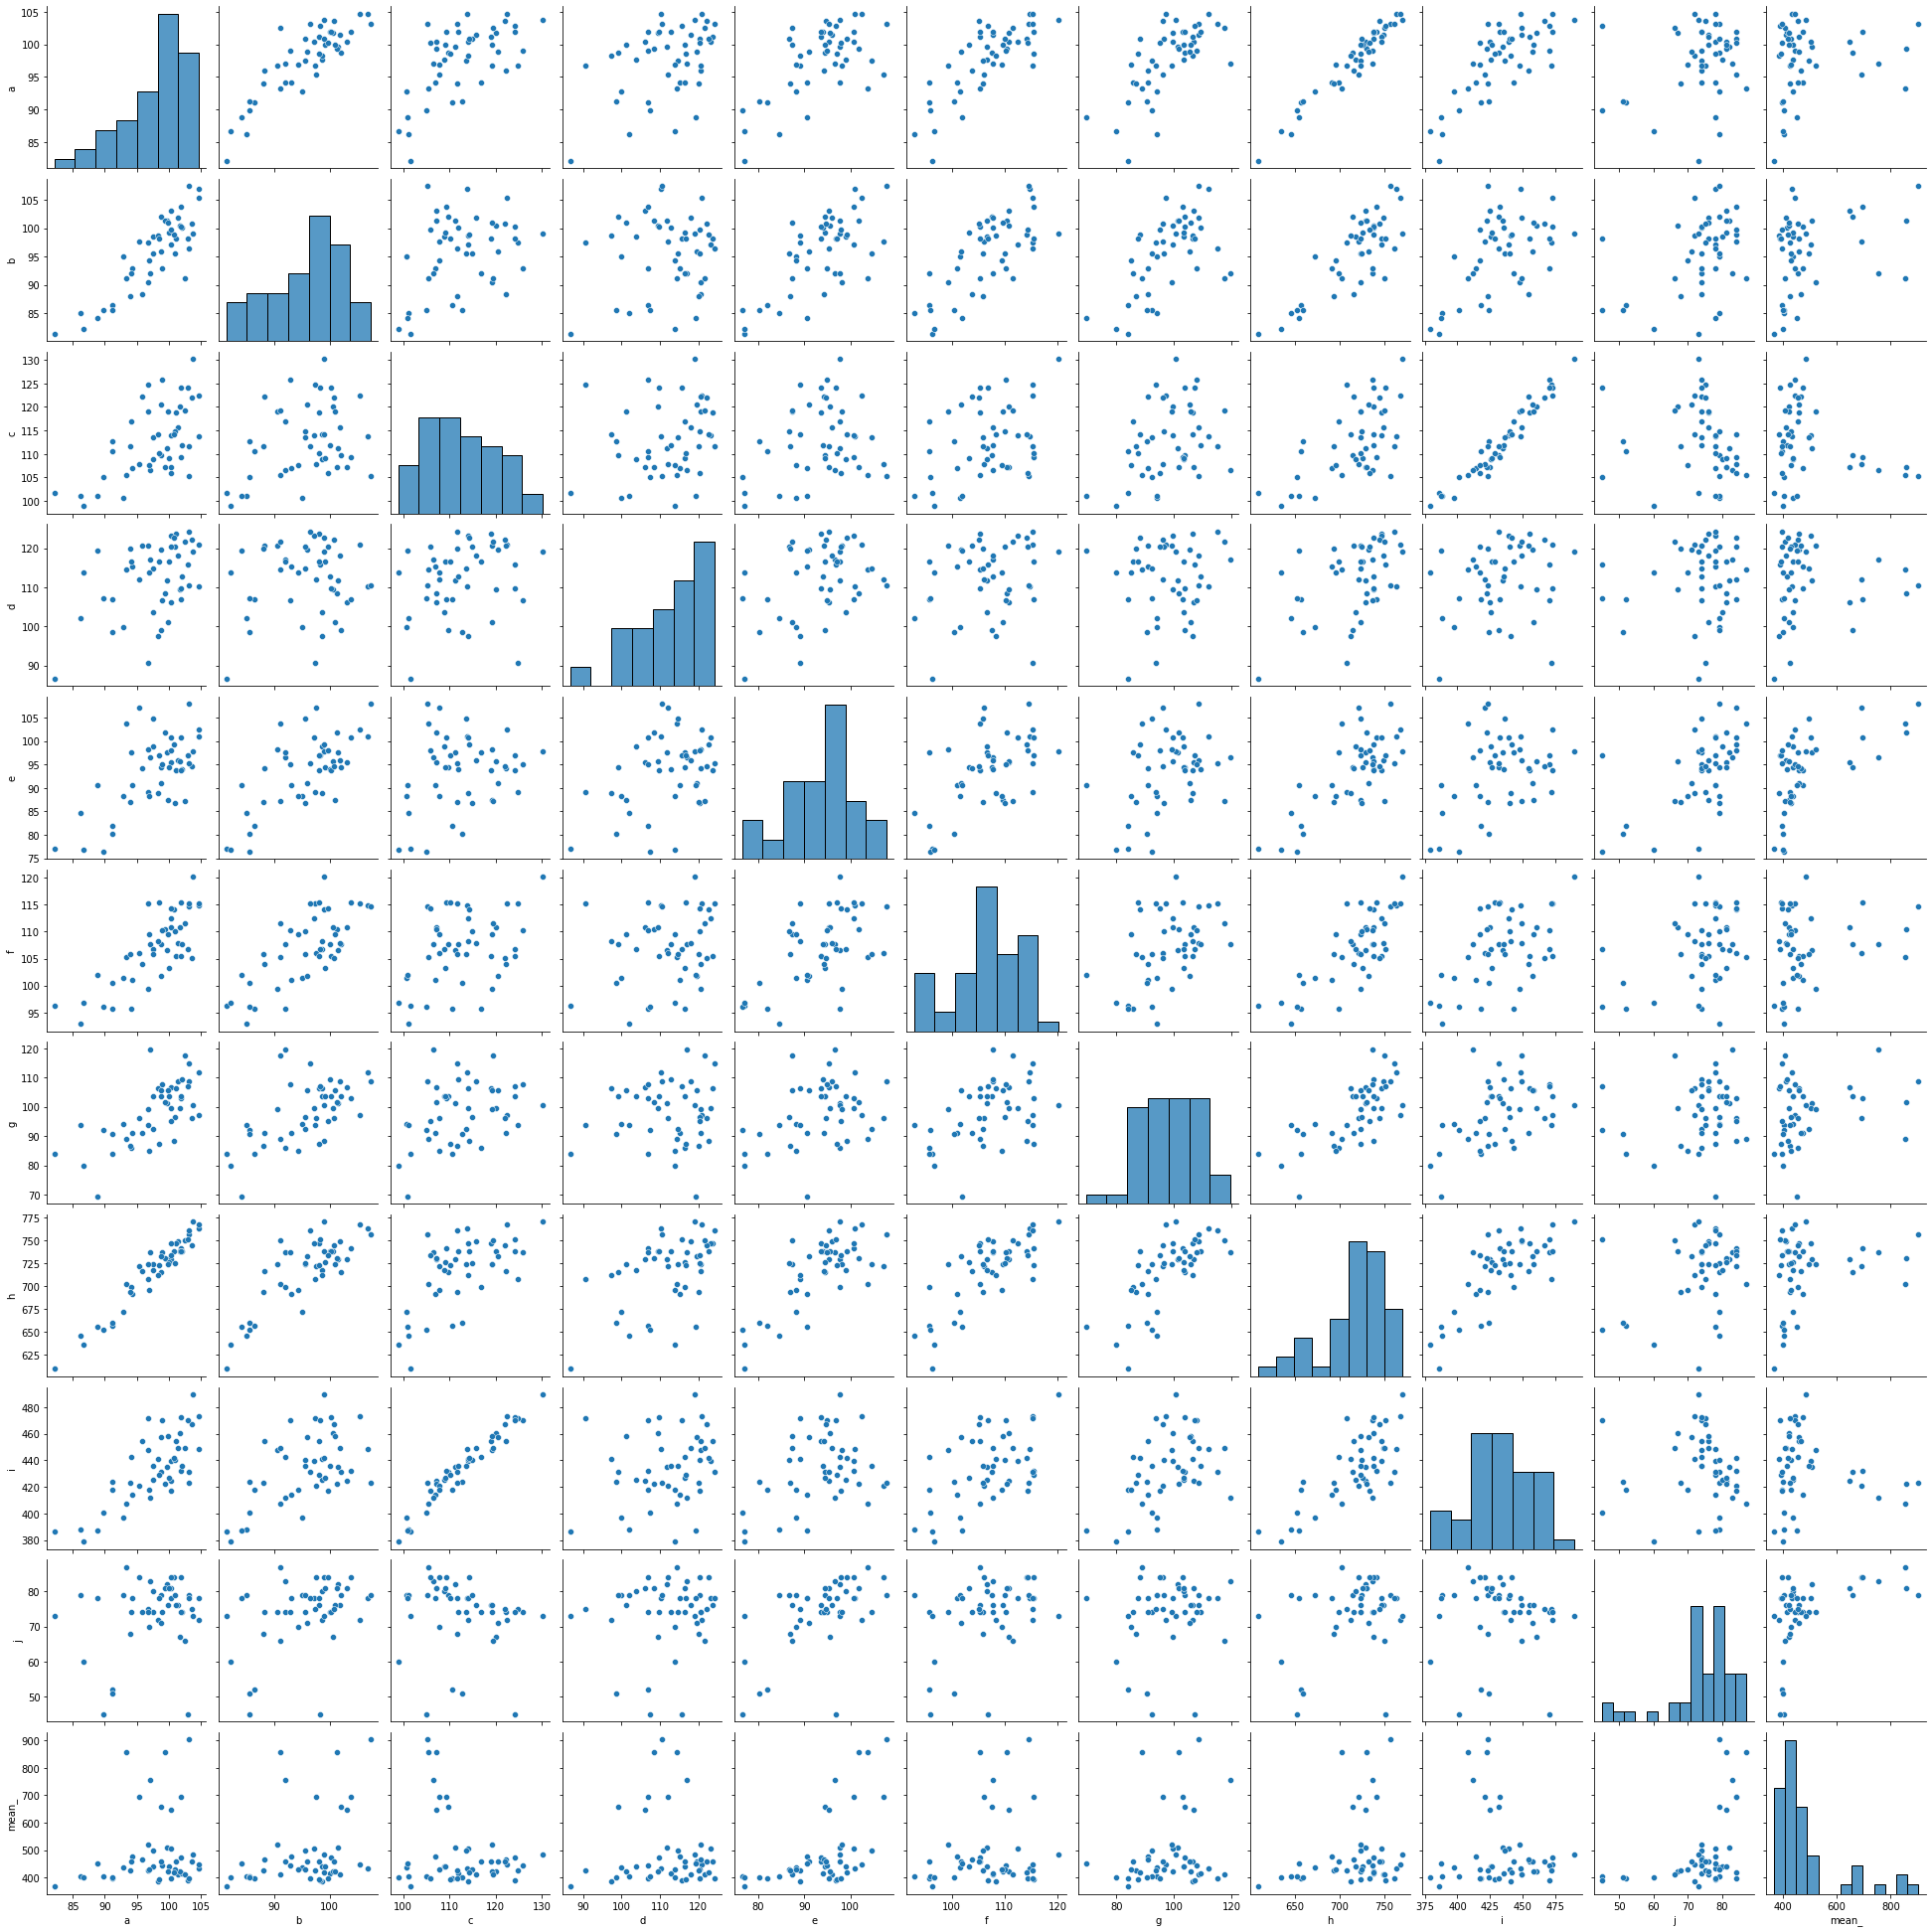

In [ ]:
sns.pairplot(a)

In [ ]:
type(a.a)

pandas.core.series.Series

In [ ]:
a = pd.concat([d,ok],axis=1)

In [ ]:
iqr_df = pd.read_csv('/test_preprocessing.csv')

In [ ]:
iqr_df

,Unnamed: 0,datetime,integration,year,month,day,time
0,0,2017-01-01 01:00:00,525.0,2017,1,1,1
1,1,2017-01-01 02:00:00,542.0,2017,1,1,2
2,2,2017-01-01 03:00:00,392.0,2017,1,1,3
3,3,2017-01-01 04:00:00,379.0,2017,1,1,4
4,4,2017-01-01 05:00:00,353.0,2017,1,1,5
...,...,...,...,...,...,...,...
35037,35058,2020-12-31 19:00:00,626.0,2020,12,31,19
35038,35059,2020-12-31 20:00:00,294.0,2020,12,31,20
35039,35060,2020-12-31 21:00:00,234.0,2020,12,31,21
35040,35061,2020-12-31 22:00:00,704.0,2020,12,31,22


In [ ]:
d = pd.read_excel("/content/ab.xlsx")

In [ ]:
# d.iloc[:,2:50]
d.drop('2017.01.1',axis=1,inplace=True)

In [ ]:
d = d.iloc[:,1:49].T

In [ ]:
d

,0,1,2,3,4,5,6,7,8,9,10
2017.01,가동률지수(원지수),94.2,93,107,115.2,90.6,101,90.9,3555,414,78
2017.02,가동률지수(원지수),92.8,95,100.7,99.9,88.2,101.5,94.2,3482,397.1,79
2017.03,가동률지수(원지수),104.7,106.9,113.8,110.3,101,114.8,111.9,3850,448.3,78
2017.04,가동률지수(원지수),98.7,102,109.8,99,94.4,107.6,103.6,4101,431.4,79
2017.05,가동률지수(원지수),99.7,101.4,111.2,111.7,97.7,106.6,101.3,3775,435,82
2017.06,가동률지수(원지수),100.4,103.1,107.1,106.1,95.4,110.8,106.8,3758,424.4,81
2017.07,가동률지수(원지수),99.4,101.3,107.1,108.5,101.9,110.4,101.7,3634,422.6,81
2017.08,가동률지수(원지수),95.3,97.6,107.8,112.1,107.2,106,96,3709,421,84
2017.09,가동률지수(원지수),103.1,107.4,105.3,110.5,107.9,114.6,108.6,4121,423.3,79
2017.10,가동률지수(원지수),93.3,91.2,105.5,114.5,103.8,105.3,89,3545,407.7,87


In [ ]:
print("18년도 1월 평균 ", iqr_df[(iqr_df["month"]==1 )&(iqr_df["year"]==2018)]["integration"].mean())
print("18년도 2월 평균 ", iqr_df[(iqr_df["month"]==2 )&(iqr_df["year"]==2018)]["integration"].mean())
print("18년도 3월 평균 ", iqr_df[(iqr_df["month"]==3 )&(iqr_df["year"]==2018)]["integration"].mean())
print("18년도 4월 평균 ", iqr_df[(iqr_df["month"]==4 )&(iqr_df["year"]==2018)]["integration"].mean())
print("18년도 5월 평균 ", iqr_df[(iqr_df["month"]==5 )&(iqr_df["year"]==2018)]["integration"].mean())
print("18년도 6월 평균 ", iqr_df[(iqr_df["month"]==6 )&(iqr_df["year"]==2018)]["integration"].mean())
print("18년도 7월 평균 ", iqr_df[(iqr_df["month"]==7 )&(iqr_df["year"]==2018)]["integration"].mean())
print("18년도 8월 평균 ", iqr_df[(iqr_df["month"]==8 )&(iqr_df["year"]==2018)]["integration"].mean())
print("18년도 9월 평균 ", iqr_df[(iqr_df["month"]==9 )&(iqr_df["year"]==2018)]["integration"].mean())
print("18년도 10월 평균 ", iqr_df[(iqr_df["month"]==10 )&(iqr_df["year"]==2018)]["integration"].mean())
print("18년도 11월 평균 ", iqr_df[(iqr_df["month"]==11 )&(iqr_df["year"]==2018)]["integration"].mean())
print("18년도 12월 평균 ", iqr_df[(iqr_df["month"]==12 )&(iqr_df["year"]==2018)]["integration"].mean())


18년도 1월 평균  439.241935483871
18년도 2월 평균  405.39608139880954
18년도 3월 평균  410.9650067294751
18년도 4월 평균  438.8833333333333
18년도 5월 평균  415.4743935309973
18년도 6월 평균  458.8423988842399
18년도 7월 평균  505.335504851752
18년도 8월 평균  497.46774193548384
18년도 9월 평균  457.61428083333334
18년도 10월 평균  446.11155913978496
18년도 11월 평균  421.99681777777784
18년도 12월 평균  444.88440860215053


In [ ]:
import math

import matplotlib.pyplot as plt

import keras

import pandas as pd

import numpy as np

from keras.models import Sequential

from keras.layers import Dense

from keras.layers import LSTM

from keras.layers import Dropout

from keras.layers import *

from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import mean_squared_error

from sklearn.metrics import mean_absolute_error

from sklearn.model_selection import train_test_split

from keras.callbacks import EarlyStopping

In [ ]:
training_set = iqr_df.iloc[:800, 1].values
test_set = iqr_df.iloc[800:, 1].values

sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

X_train = []
y_train = []

for i in range(60, 800):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))



ValueError: Expected 2D array, got 1D array instead:
array=[525. 542. 392. 379. 353. 268. 479. 343. 422. 577. 333. 512. 508. 654.
 351. 447. 495. 446. 343. 513. 517. 407. 294. 506. 637. 397. 276. 388.
 404. 429. 582. 340. 382. 310. 424. 497. 590. 539. 514. 551. 555. 601.
 458. 590. 387. 564. 513. 455. 612. 331. 320. 584. 421. 460. 543. 508.
 349. 534. 481. 576. 563. 339. 679. 480. 573. 470. 624. 652. 491. 380.
 471. 208. 408. 587. 491. 410. 399. 269. 570. 586. 465. 564. 445. 254.
 367. 619. 659. 368. 484. 606. 536. 407. 581. 491. 279. 528. 414. 563.
 525. 377. 460. 641. 485. 478. 411. 579. 331. 524. 527. 666. 701. 310.
 524. 447. 429. 584. 446. 592. 290. 383. 426. 424. 604. 604. 462. 464.
 286. 622. 460. 537. 487. 386. 520. 613. 748. 569. 462. 293. 417. 563.
 365. 595. 423. 538. 494. 379. 439. 739. 491. 350. 479. 245. 485. 708.
 478. 390. 564. 339. 534. 687. 425. 509. 432. 188. 524. 711. 513. 327.
 479. 552. 336. 582. 483. 284. 449. 420. 264. 514. 668. 329. 498. 509.
 333. 570. 768. 563. 278. 336. 553. 546. 367. 561. 320. 482. 568. 354.
 541. 526. 395. 508. 266. 284. 587. 814. 429. 483. 516. 371. 529. 476.
 584. 650. 435. 344. 521. 364. 488. 637. 425. 563. 418. 398. 645. 457.
 539. 445. 574. 242. 352. 548. 699. 617. 488. 357. 565. 613. 405. 484.
 421. 340. 558. 347. 583. 481. 427. 564. 282. 347. 495. 494. 620. 459.
 498. 621. 460. 553. 447. 693. 598. 289. 501. 400. 304. 705. 455. 489.
 548. 268. 250. 534. 622. 464. 594. 332. 283. 581. 619. 561. 685. 507.
 556. 519. 282. 434. 609. 333. 631. 582. 356. 359. 523. 479. 397. 562.
 351. 394. 537. 491. 530. 488. 688. 707. 598. 262. 537. 496. 492. 537.
 502. 428. 563. 435. 285. 539. 422. 620. 513. 290. 366. 461. 632. 469.
 437. 494. 433. 557. 649. 603. 445. 417. 480. 352. 534. 574. 255. 415.
 515. 529. 386. 500. 338. 458. 567. 295. 586. 556. 313. 445. 327. 491.
 586. 645. 343. 455. 429. 346. 350. 696. 366. 467. 458. 339. 530. 436.
 512. 476. 233. 487. 401. 522. 637. 610. 379. 593. 558. 630. 541. 573.
 484. 512. 483. 573. 505. 730. 487. 318. 504. 460. 497. 620. 606. 460.
 460. 546. 695. 623. 669. 648. 545. 613. 630. 707. 493. 493. 625. 335.
 604. 651. 574. 386. 492. 611. 592. 556. 591. 421. 410. 611. 621. 550.
 645. 514. 622. 595. 615. 650. 582. 544. 353. 454. 549. 693. 453. 432.
 549. 473. 526. 521. 406. 537. 568. 656. 542. 628. 479. 543. 658. 551.
 484. 597. 638. 549. 586. 339. 430. 540. 621. 573. 455. 457. 566. 596.
 506. 295. 327. 574. 537. 504. 550. 586. 562. 592. 534. 533. 534. 539.
 530. 513. 413. 351. 615. 595. 526. 524. 579. 599. 333. 431. 523. 563.
 399. 441. 606. 309. 567. 562. 385. 409. 464. 368. 601. 307. 428. 328.
 496. 405. 269. 415. 361. 335. 514. 376. 205. 583. 269. 458. 484. 261.
 749. 551. 510. 255. 364. 435. 285. 484. 541. 347. 367. 526. 279. 530.
 246. 247. 570. 274. 408. 595. 362. 575. 544. 313. 617. 558. 553. 596.
 493. 322. 544. 412. 366. 593. 514. 349. 466. 447. 351. 588. 276. 381.
 497. 254. 543. 475. 371. 471. 585. 683. 561. 440. 324. 341. 468. 399.
 525. 374. 486. 357. 337. 597. 562. 387. 465. 396. 359. 511. 484. 408.
 548. 346. 527. 541. 568. 420. 585. 572. 418. 500. 260. 539. 470. 441.
 505. 554. 341. 592. 271. 363. 528. 392. 488. 624. 403. 494. 487. 556.
 619. 327. 532. 509. 345. 565. 398. 409. 464. 384. 518. 396. 334. 548.
 334. 491. 472. 440. 444. 393. 516. 579. 489. 381. 590. 502. 313. 497.
 516. 224. 371. 511. 398. 295. 465. 418. 437. 516. 293. 628. 309. 482.
 572. 573. 358. 335. 556. 285. 613. 464. 306. 598. 513. 316. 467. 415.
 341. 461. 392. 585. 624. 300. 474. 268. 337. 501. 343. 450. 513. 390.
 519. 295. 526. 329. 507. 502. 380. 172. 521. 488. 307. 406. 463. 545.
 596. 242. 257. 460. 276. 286. 588. 308. 533. 582. 585. 481. 425. 469.
 422. 676. 334. 292. 506. 309. 447. 727. 366. 286. 534. 343. 584. 418.
 284. 523. 441. 498. 560. 344. 618. 574. 535. 323. 388. 534. 445. 453.
 351. 678. 455. 363. 363. 524. 300. 567. 297. 377. 468. 405. 602. 430.
 530. 692. 634. 399. 513. 617. 441. 478. 591. 365. 456. 421. 288. 359.
 582. 295. 365. 557. 387. 352. 447. 321. 581. 400. 545. 617. 607. 619.
 461. 586. 329. 480. 437. 351. 377. 460. 432. 554. 446. 346. 461. 319.
 469. 448.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
training_set = iqr_df.iloc[:800, 1:2].values
test_set = iqr_df.iloc[800:, 1:2].values

In [ ]:

sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)


In [ ]:
X_train = []
y_train = []

for i in range(60, 800):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [ ]:
X_train

array([[[0.54984424],
        [0.57632399],
        [0.34267913],
        ...,
        [0.56386293],
        [0.48130841],
        [0.62928349]],

       [[0.57632399],
        [0.34267913],
        [0.32242991],
        ...,
        [0.48130841],
        [0.62928349],
        [0.60903427]],

       [[0.34267913],
        [0.32242991],
        [0.28193146],
        ...,
        [0.62928349],
        [0.60903427],
        [0.26012461]],

       ...,

       [[0.23520249],
        [0.3364486 ],
        [0.56386293],
        ...,
        [0.42679128],
        [0.27102804],
        [0.45015576]],

       [[0.3364486 ],
        [0.56386293],
        [0.42523364],
        ...,
        [0.27102804],
        [0.45015576],
        [0.22897196]],

       [[0.56386293],
        [0.42523364],
        [0.4376947 ],
        ...,
        [0.45015576],
        [0.22897196],
        [0.46261682]]])

In [ ]:
y_train

array([0.60903427, 0.26012461, 0.78971963, 0.47975078, 0.62461059,
       0.46417445, 0.70404984, 0.74766355, 0.49688474, 0.32398754,
       0.46573209, 0.05607477, 0.36760125, 0.64641745, 0.49688474,
       0.37071651, 0.35358255, 0.15109034, 0.61993769, 0.64485981,
       0.45638629, 0.6105919 , 0.42523364, 0.12772586, 0.30373832,
       0.69626168, 0.75856698, 0.30529595, 0.48598131, 0.67601246,
       0.56697819, 0.36604361, 0.63707165, 0.49688474, 0.16666667,
       0.55451713, 0.37694704, 0.60903427, 0.54984424, 0.31931464,
       0.44859813, 0.7305296 , 0.48753894, 0.47663551, 0.37227414,
       0.63395639, 0.24766355, 0.5482866 , 0.5529595 , 0.7694704 ,
       0.82398754, 0.21495327, 0.5482866 , 0.42834891, 0.40031153,
       0.64174455, 0.42679128, 0.65420561, 0.18380062, 0.32866044,
       0.39563863, 0.39252336, 0.6728972 , 0.6728972 , 0.4517134 ,
       0.45482866, 0.17757009, 0.70093458, 0.44859813, 0.56853583,
       0.49065421, 0.33333333, 0.54205607, 0.68691589, 0.89719

In [ ]:
model = Sequential()

#Adding the first LSTM layer and some Dropout regularisation

model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))

model.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation

model.add(LSTM(units = 50, return_sequences = True))

model.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation

model.add(LSTM(units = 50, return_sequences = True))

model.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation

model.add(LSTM(units = 50))

model.add(Dropout(0.2))

# Adding the output layer

model.add(Dense(units = 1))

# Compiling the RNN

model.compile(optimizer = "adam", loss = "mean_squared_error")

# Fitting the RNN to the Training set

model.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
24/24 [==============================] - 20s 134ms/step - loss: 0.0683
Epoch 2/100
24/24 [==============================] - 3s 130ms/step - loss: 0.0351
Epoch 3/100
24/24 [==============================] - 3s 130ms/step - loss: 0.0339
Epoch 4/100
24/24 [==============================] - 3s 130ms/step - loss: 0.0337
Epoch 5/100
24/24 [==============================] - 3s 130ms/step - loss: 0.0333
Epoch 6/100
24/24 [==============================] - 3s 130ms/step - loss: 0.0326
Epoch 7/100
24/24 [==============================] - 3s 134ms/step - loss: 0.0330
Epoch 8/100
24/24 [==============================] - 3s 130ms/step - loss: 0.0340
Epoch 9/100
24/24 [==============================] - 3s 130ms/step - loss: 0.0340
Epoch 10/100
24/24 [==============================] - 3s 130ms/step - loss: 0.0345
Epoch 11/100
24/24 [==============================] - 3s 132ms/step - loss: 0.0338
Epoch 12/100
24/24 [==============================] - 3s 130ms/step - loss: 0.0354
Epoch 13/100

24/24 [==============================] - 3s 129ms/step - loss: 0.0298
Epoch 100/100
24/24 [==============================] - 3s 134ms/step - loss: 0.0293


In [ ]:
iqr_df.to_csv("./first_preprocessing.csv")

In [ ]:
dataset_train = iqr_df.iloc[:800, 1:2]

dataset_test = iqr_df.iloc[800:, 1:2]

dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)

inputs = dataset_total[len(dataset_total)-len(dataset_test) - 60:].values

inputs = inputs.reshape(-1,1)

inputs = sc.transform(inputs)

X_test = []

for i in range(60, 519):
    X_test.append(inputs[i-60:i, 0])

X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

print(X_test.shape)

(459, 60, 1)


15/15 [==============================] - 1s 52ms/step


ValueError: x and y must have same first dimension, but have shapes (34132,) and (800, 1)

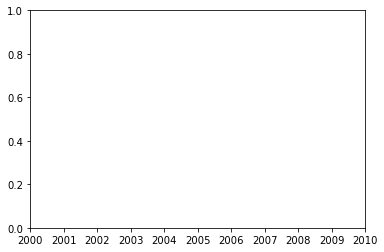

In [ ]:
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

plt.plot(iqr_df.loc[800:, "datetime"],dataset_test.values, color = "red", label = "real")
plt.plot(iqr_df.loc[800:, "datetime"],predicted_stock_price[:800], color = "blue", label = "Predicted")

plt.xticks(np.arange(0,459,50))
plt.title("asdf")
plt.xlabel("time")
plt.ylabel("inte")
plt.legend()
plt.show()

In [ ]:
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

15/15 [==============================] - 1s 54ms/step


In [ ]:
predicted_stock_price[:800]

array([[422.39334],
       [435.8129 ],
       [456.2387 ],
       [480.42   ],
       [508.24033],
       [526.37823],
       [530.54614],
       [521.3406 ],
       [505.53998],
       [480.1949 ],
       [459.92352],
       [436.4884 ],
       [419.14682],
       [407.67236],
       [399.40656],
       [395.7208 ],
       [393.23856],
       [392.9625 ],
       [394.73734],
       [396.9582 ],
       [398.2595 ],
       [401.66354],
       [408.24094],
       [416.04523],
       [427.5091 ],
       [443.6406 ],
       [458.31522],
       [473.22147],
       [483.90656],
       [486.59546],
       [484.13562],
       [481.2981 ],
       [469.90887],
       [458.78668],
       [451.39584],
       [441.27222],
       [431.9268 ],
       [425.2696 ],
       [418.48956],
       [415.47156],
       [411.8378 ],
       [410.7126 ],
       [412.64874],
       [417.9501 ],
       [428.0596 ],
       [439.57172],
       [456.04666],
       [466.04044],
       [474.7694 ],
       [475.57166],


In [ ]:
predicted_stock_price = model.predict(X_test)
predicted_stock_price

15/15 [==============================] - 1s 50ms/step


array([[0.3900208 ],
       [0.41092354],
       [0.44273943],
       [0.48040503],
       [0.52373886],
       [0.55199105],
       [0.5584831 ],
       [0.5441442 ],
       [0.5195327 ],
       [0.48005438],
       [0.44847906],
       [0.41197574],
       [0.3849639 ],
       [0.36709094],
       [0.35421586],
       [0.3484748 ],
       [0.34460837],
       [0.34417838],
       [0.3469429 ],
       [0.35040218],
       [0.35242912],
       [0.35773137],
       [0.36797655],
       [0.3801328 ],
       [0.39798927],
       [0.4231162 ],
       [0.44597387],
       [0.46919233],
       [0.4858358 ],
       [0.4900241 ],
       [0.48619258],
       [0.48177278],
       [0.46403253],
       [0.44670826],
       [0.43519604],
       [0.41942716],
       [0.4048704 ],
       [0.39450097],
       [0.38394013],
       [0.3792392 ],
       [0.37357914],
       [0.37182647],
       [0.3748423 ],
       [0.38309985],
       [0.39884675],
       [0.4167784 ],
       [0.44244033],
       [0.458

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

C:\Users\NTX550\AppData\Local\Temp\ipykernel_13752\3440337988.py:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


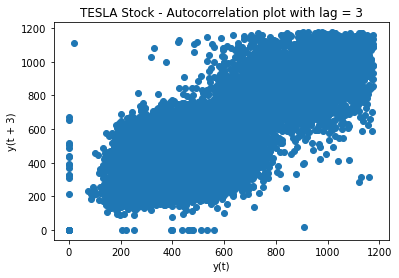

In [ ]:
plt.figure()
lag_plot(iqr_df['integration'], lag=3)
plt.title('TESLA Stock - Aut,ocorrelation plot with lag = 3')
plt.show()

In [ ]:
train_data, test_data = iqr_df[0:int(len(iqr_df)*0.7)], iqr_df[int(len(iqr_df)*0.7):]
training_data = train_data['integration'].values
test_data = test_data['integration'].values
history = [x for x in training_data]
model_predictions = []
N_test_observations = len(test_data)
for time_point in range(N_test_observations):
    model = ARIMA(history, order=(1,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions.append(yhat)
    true_test_value = test_data[time_point]
    history.append(true_test_value)
MSE_error = mean_squared_error(test_data, model_predictions)
print('Testing Mean Squared Error is {}'.format(MSE_error))

NotImplementedError: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been removed in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and statsmodels.tsa.SARIMAX.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained. It also offers alternative specialized
parameter estimators.


In [ ]:
import itertools
import warnings

In [ ]:
import datetime

In [ ]:
from datetime import datetime

In [ ]:
from scalecast.Forecaster import Forecaster
import matplotlib.pyplot as plt
import pandas_datareader as pdr

<AxesSubplot:xlabel='Date', ylabel='Values'>

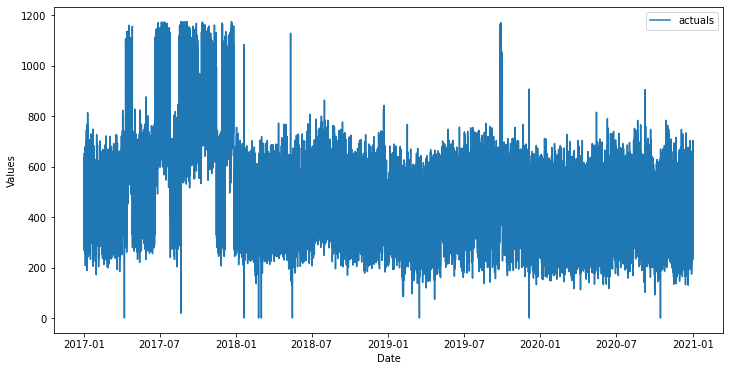

In [ ]:
f = Forecaster(y=iqr_df["integration"], current_dates=iqr_df["datetime"])
f.plot()

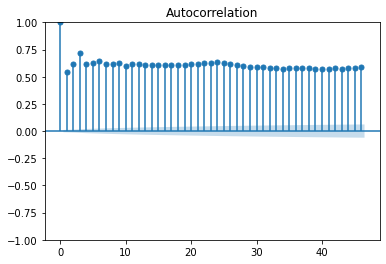

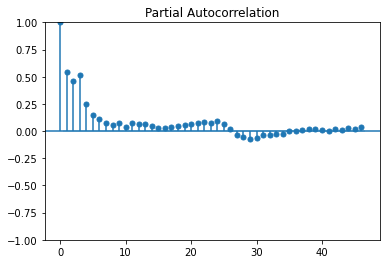

In [ ]:
f.plot_acf()
f.plot_pacf()
plt.show()

In [ ]:
# MA 모델을 돌려야돼
# 안섞음

In [ ]:
import pandas as pd

In [ ]:
ma3 = pd.read_csv("/content/test_preprocessing.csv")
ma3

,Unnamed: 0,datetime,integration,year,month,day,time
0,0,2017-01-01 01:00:00,525.0,2017,1,1,1
1,1,2017-01-01 02:00:00,542.0,2017,1,1,2
2,2,2017-01-01 03:00:00,392.0,2017,1,1,3
3,3,2017-01-01 04:00:00,379.0,2017,1,1,4
4,4,2017-01-01 05:00:00,353.0,2017,1,1,5
...,...,...,...,...,...,...,...
35037,35058,2020-12-31 19:00:00,626.0,2020,12,31,19
35038,35059,2020-12-31 20:00:00,294.0,2020,12,31,20
35039,35060,2020-12-31 21:00:00,234.0,2020,12,31,21
35040,35061,2020-12-31 22:00:00,704.0,2020,12,31,22


In [ ]:
ma3.drop(columns=["Unnamed: 0"], inplace=True)

In [ ]:
ma3['ma336'] = ma3['integration'].ewm(336).mean()
ma3

,datetime,integration,year,month,day,time,ma3,redisual,ma336
0,2017-01-01 01:00:00,525.0,2017,1,1,1,525.000000,0.000000,525.000000
1,2017-01-01 02:00:00,542.0,2017,1,1,2,534.714286,-7.285714,533.512630
2,2017-01-01 03:00:00,392.0,2017,1,1,3,473.000000,81.000000,486.201503
3,2017-01-01 04:00:00,379.0,2017,1,1,4,438.622857,59.622857,459.281542
4,2017-01-01 05:00:00,353.0,2017,1,1,5,410.556978,57.556978,437.898709
...,...,...,...,...,...,...,...,...,...
35037,2020-12-31 19:00:00,626.0,2020,12,31,19,457.932608,-168.067392,399.832647
35038,2020-12-31 20:00:00,294.0,2020,12,31,20,416.949456,122.949456,399.518603
35039,2020-12-31 21:00:00,234.0,2020,12,31,21,371.212092,137.212092,399.027450
35040,2020-12-31 22:00:00,704.0,2020,12,31,22,454.409069,-249.590931,399.932413


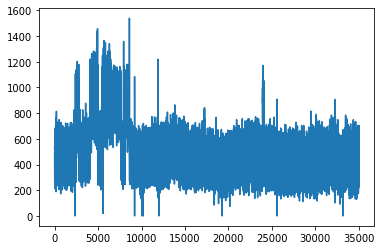

In [ ]:
ma3["integration"].plot()

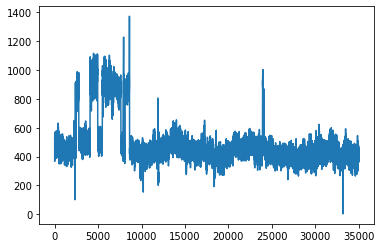

In [ ]:
ma3["ma3"].plot()

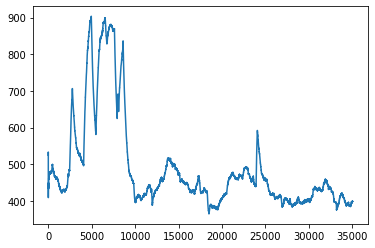

In [ ]:
ma3["ma336"].plot()

In [ ]:
ma3["redisual336"] = ma3["ma336"]-ma3["integration"]
ma3

,datetime,integration,year,month,day,time,ma3,redisual,ma336,redisual336
0,2017-01-01 01:00:00,525.0,2017,1,1,1,525.000000,0.000000,525.000000,0.000000
1,2017-01-01 02:00:00,542.0,2017,1,1,2,534.714286,-7.285714,533.512630,-8.487370
2,2017-01-01 03:00:00,392.0,2017,1,1,3,473.000000,81.000000,486.201503,94.201503
3,2017-01-01 04:00:00,379.0,2017,1,1,4,438.622857,59.622857,459.281542,80.281542
4,2017-01-01 05:00:00,353.0,2017,1,1,5,410.556978,57.556978,437.898709,84.898709
...,...,...,...,...,...,...,...,...,...,...
35037,2020-12-31 19:00:00,626.0,2020,12,31,19,457.932608,-168.067392,399.832647,-226.167353
35038,2020-12-31 20:00:00,294.0,2020,12,31,20,416.949456,122.949456,399.518603,105.518603
35039,2020-12-31 21:00:00,234.0,2020,12,31,21,371.212092,137.212092,399.027450,165.027450
35040,2020-12-31 22:00:00,704.0,2020,12,31,22,454.409069,-249.590931,399.932413,-304.067587


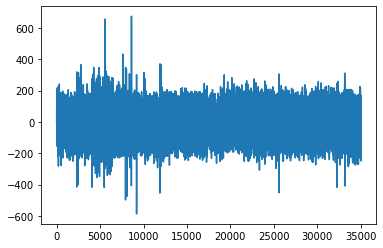

In [ ]:
ma3[""].plot()